## 데이터 불러오기

In [1]:
import pandas as pd
df=pd.read_csv('data/country.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Column 추리기

- country = Name of the country.
- child_mort = Death of children under 5 years of age per 1000 live births.
- exports = Exports of goods and services per capita. Given as %age of the GDP per capita.
- health = Total health spending per capita. Given as %age of GDP per capita.
- imports = Imports of goods and services per capita. Given as %age of the GDP per capita.
- Income = Net income per person.
- Inflation = The measurement of the annual growth rate of the Total GDP.
- life_expec = The average number of years a new born child would live if the current mortality patterns are to remain the same.
- total_fer = The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp = The GDP per capita. Calculated as the Total GDP divided by the total population.

In [2]:
columns=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
X = df[columns]

In [3]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Normalize Data

In [4]:
X = (X-X.mean())/X.std()

## PCA 학습

In [5]:
from sklearn.decomposition import PCA
pca=PCA()
Z=pca.fit_transform(X)
Z.shape

(167, 9)

In [6]:
pca.explained_variance_

array([4.13565658, 1.54634631, 1.1703833 , 0.99478456, 0.66061903,
       0.22358112, 0.11343874, 0.08831536, 0.06687501])

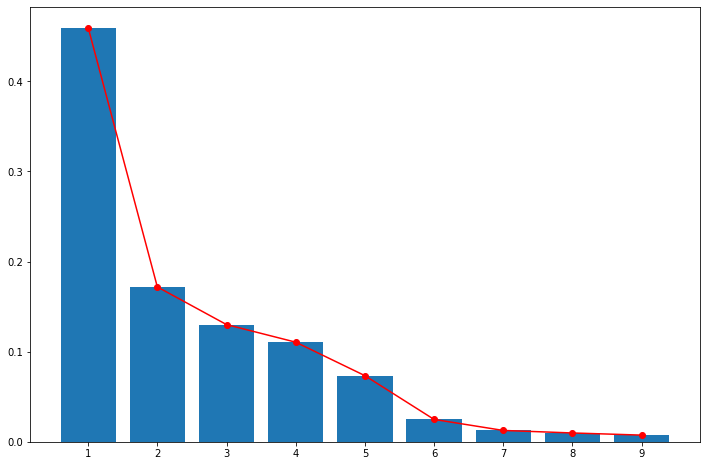

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.bar(columns, pca.explained_variance_ratio_,tick_label=range(1,10))
plt.plot(pca.explained_variance_ratio_, 'or-')


In [8]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

## 2차원 축에 그려보기

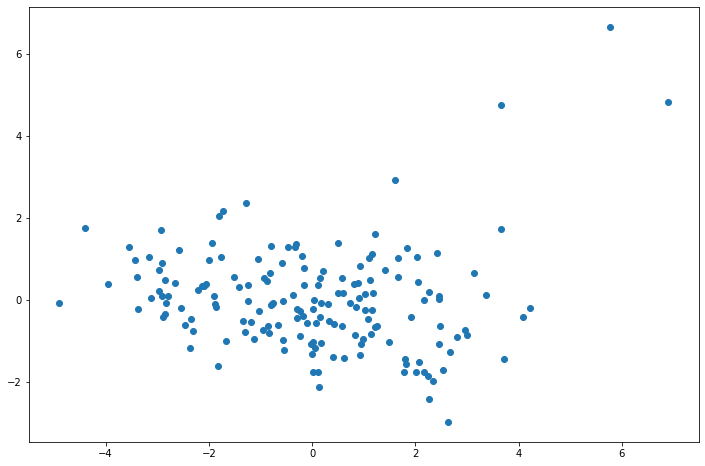

In [9]:
import matplotlib.pyplot as plt
z1 = Z[:,0]
z2 = Z[:,1]
plt.figure(figsize=(12,8))
plt.scatter(z1,z2)

## Eigen Vector를 활용한 의미분석

In [10]:
pca.components_.shape

(9, 9)

In [11]:
factor1=pca.components_[0,:]
factor2=pca.components_[1,:]

In [12]:
factor1

array([-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
       -0.19317293,  0.42583938, -0.40372896,  0.39264482])

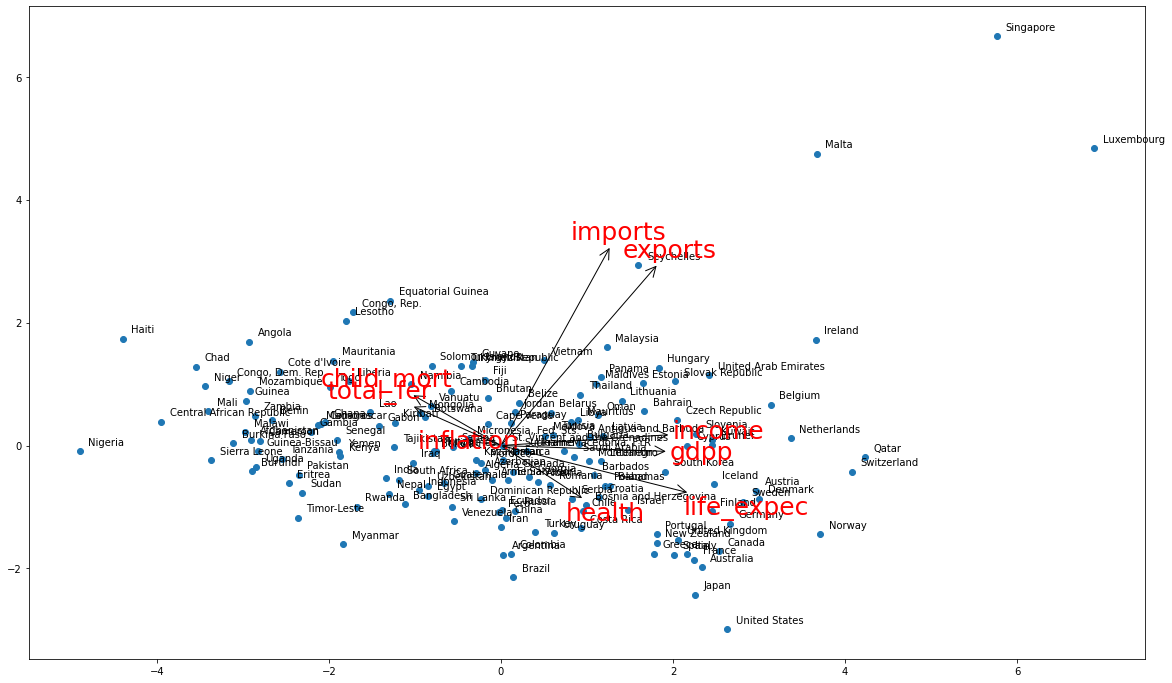

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.scatter(z1, z2)

nations = np.array(df['country'])

for i in range(len(Z)):
    plt.annotate(nations[i], (z1[i]+0.1, z2[i]+0.1))

for i in range(len(columns)):
    plt.annotate(columns[i],
                 xy=(0,0),
                 xytext=(factor1[i]*5,factor2[i]*5),
                 arrowprops={'lw':1,'arrowstyle':'<-'},
                fontsize=25,color='r')

- child_mort = Death of children under 5 years of age per 1000 live births. (f1, 왼쪽)
- exports = Exports of goods and services per capita. Given as %age of the GDP per capita. (f1,f2, 우상향)
- health = Total health spending per capita. Given as %age of GDP per capita. (f1,오른쪽)
- imports = Imports of goods and services per capita. Given as %age of the GDP per capita.(f1,f2, 우상향)
- Income = Net income per person. (f1, 오른쪽)
- Inflation = The measurement of the annual growth rate of the Total GDP. (영향 미미)
- life_expec = The average number of years a new born child would live if the current mortality patterns are to remain the same. (f1, 오른쪽)
- total_fer = The number of children that would be born to each woman if the current age-fertility rates remain the same. ()
- gdpp = The GDP per capita. Calculated as the Total GDP divided by the total population.